In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
# import PyPDF2
from tabula import read_pdf
import requests
import urllib3
import time
import numpy as np

In [3]:
df = pd.read_csv('CAfires188.csv')
years = list(df['FIRE_YEAR'].unique())
years.sort(key=int)

# sm = year_df['FIRE_SIZE'].sum()
ls=[]
dc = {}
for year in years:
    year_df = df[df['FIRE_YEAR']==year]
    sm = year_df['FIRE_SIZE'].sum()
    dc[year] = sm

fire_df = pd.DataFrame([dc], index=['Acres'])
fire_df

/Users/MarsRedSky/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (11,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
Acres,208038.2,265227.3,350544.8,162139.7,593041.7,238824.9,116331.7,744668.7,202613.7,278044.1,326988.2,670160.42,144022.29,181863.44,634694.39,960591.52,1184448.2,381965.03


In [4]:
stacked = fire_df.stack()
stacked = stacked.to_frame()
stacked = stacked.reset_index(level=0)
fire_df = stacked.rename(index=str, columns={'level_0':'Unit',0:'Acres Burnt'})
fire_df.head()

,Unit,Acres Burnt
1992,Acres,208038.2
1993,Acres,265227.3
1994,Acres,350544.8
1995,Acres,162139.7
1996,Acres,593041.7


In [5]:
df1 = pd.read_csv('Biomass_data.csv')

In [6]:
years = list(set(df1['Year Code'].unique()))
df2 = df1.groupby('Year Code')
dc = {}
for year in years:
#     display(df2.get_group(year))
    temp_df = df2.get_group(year)
    dc[year] = temp_df['Value'].sum()
biomass_df = pd.DataFrame([dc], index=['Hectares'])
biomass_df

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Hectares,4285410.09,4280129.34,4274848.63,4269567.91,4264287.15,4259006.42,4253725.67,4248444.95,4243164.19,4237883.48,...,4221985.23,4220084.61,4218183.93,4216283.27,4214516.42,4212750.75,4210985.1,4209219.43,4207453.76,4205688.09


In [7]:
stacked = biomass_df.stack()
stacked = stacked.to_frame()
stacked = stacked.reset_index(level=0)
stacked = stacked.drop(columns=['level_0'])
biomass_df = stacked.rename(index=str, columns={0:'Biomass(ha)'})
biomass_df.head()
biomass_df.to_csv('biomass.csv')

In [8]:
df3 = pd.read_csv('seattleWeather_1948-2017.csv')
df3['DATE'] = pd.to_datetime(df3['DATE'])
df3.set_index('DATE', inplace=True)
df3['YEAR'] = pd.DatetimeIndex(df3.index).year
df3['MONTH'] = pd.DatetimeIndex(df3.index).month
df3['DAY'] = pd.DatetimeIndex(df3.index).day

In [9]:
df4= df3.groupby('YEAR')
dc = {}
for year in df3['YEAR'].unique():
    temp_df =  df4.get_group(year)
    dc[year] = temp_df['PRCP'].sum()
seattle_rain_df = pd.DataFrame([dc], index=['Inches'])
seattle_rain_df

,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Inches,45.79,32.46,55.14,40.3,23.78,49.42,41.27,46.61,36.85,34.63,...,30.73,38.44,46.99,36.39,48.26,32.56,48.5,44.83,45.18,43.55


In [10]:
stacked = seattle_rain_df.stack()
stacked = stacked.to_frame()
stacked = stacked.reset_index(level=0)
# df.rename(index=str, columns={"A": "a", "C": "c"})
seattle_rain_df = stacked.rename(index=str, columns={'level_0': 'Unit', 0:'Prcp'})
seattle_rain_df.head()
seattle_rain_df.to_csv('seattle_rain.csv')

In [11]:
df7 = pd.read_csv('spline_merged_ice_core_yearly.csv', skiprows=28, names=['year', 'ppm'])
df7.head()

,year,ppm
0,1,276.064
1,2,276.112
2,3,276.163
3,4,276.218
4,5,276.276


In [12]:
df8 = pd.read_csv('GlobalLandTemperaturesByCity.csv')
boston_df = df8.copy()[df8['City']=='Boston']
boston_df['dt'] = pd.to_datetime(boston_df['dt'])
boston_df.set_index('dt', inplace=True)
boston_df = boston_df.dropna(subset=['AverageTemperature'])
boston_df['year'] = pd.DatetimeIndex(boston_df.index).year

In [13]:
dc = boston_df['year'].value_counts().to_dict()
good_year = [k for k, v in dc.items() if v== 12]

In [14]:
boston_df = boston_df.groupby('year')

In [15]:
boston_avg_temp_df = pd.DataFrame()

In [16]:
more_boston = pd.read_csv('NOWdatabostonmonthtemps2013-2018.csv')
years = more_boston['year'].unique()

In [17]:
dc1 ={}
for year in good_year:
    temp_df = boston_df.get_group(year)
#     print(temp_df['AverageTemperature'].mean())
#     boston_avg_temp_df[year] = temp_df['AverageTemperature'].mean()
    dc1[year] = temp_df['AverageTemperature'].mean()

In [18]:
# boston_avg_temp_df = pd.DataFrame(list(dc1.items()), columns=['year', 'average_anual_temp'])
boston_avg_temp_df = pd.DataFrame([dc1])

In [19]:
boston_avg_temp_df = boston_avg_temp_df.stack()
# boston_avg_temp_df.head()

In [20]:
boston_avg_temp_df = boston_avg_temp_df.to_frame()

In [21]:
boston_avg_temp_df.head()
boston_avg_temp_df.columns = ['AverageTemperature']
more_boston = more_boston.groupby('year')

In [22]:
boston_avg_temp_df.index = boston_avg_temp_df.index.droplevel(0)

In [23]:
boston_avg_temp_df.head()

,AverageTemperature
1753,7.349333
1758,6.088583
1759,6.804167
1766,7.958583
1768,6.739583


In [24]:
new_dc = {}
for year in years:
    temp_df = more_boston.get_group(year)
    new_dc[year] = (temp_df['annual'].sum() -32) * (5/9)
new_dc

{2013: 11.11111111111111,
 2014: 10.611111111111112,
 2015: 10.88888888888889,
 2016: 11.88888888888889,
 2017: 11.444444444444446,
 2018: 11.666666666666668}

In [25]:
boston_avg_temp_df.head()

,AverageTemperature
1753,7.349333
1758,6.088583
1759,6.804167
1766,7.958583
1768,6.739583


In [26]:
# df  = pd.DataFrame([podcast_dict], columns=podcast_dict.keys())
# df_podcast = pd.concat([df_podcast, df], axis =0).reset_index()
new_df = pd.DataFrame.from_dict(new_dc, orient='index', columns=['AverageTemperature'])
# test = pd.concat([boston_avg_temp_df, new_df], axis=0).reset_index()
all_dfs = [boston_avg_temp_df, new_df]

# Give all df's common column names
# for df in all_dfs:
#     df.columns = ['AverageTemperature']

# test = pd.concat(all_dfs)
boston_avg_temp_df = boston_avg_temp_df.append([new_df])

In [27]:
boston_avg_temp_df

,AverageTemperature
1753,7.349333
1758,6.088583
1759,6.804167
1766,7.958583
1768,6.739583
1769,6.937333
1770,6.987750
1771,7.718083
1772,7.437750
1773,7.969083


In [28]:
# comb_df = fire_df.join(seattle_rain_df, how='left')

In [29]:
df7.set_index('year', inplace=True)

In [30]:
# boston_avg_temp_df = boston_avg_temp_df.rename({0: 'anual_temp'})

In [31]:
boston_avg_temp_df.columns = ['average_anual_temp(c)']
boston_avg_temp_df

,average_anual_temp(c)
1753,7.349333
1758,6.088583
1759,6.804167
1766,7.958583
1768,6.739583
1769,6.937333
1770,6.987750
1771,7.718083
1772,7.437750
1773,7.969083


In [32]:
c02_temp_df = boston_avg_temp_df.join(df7, how='left')
c02_temp_df.to_csv('c02temp.csv')

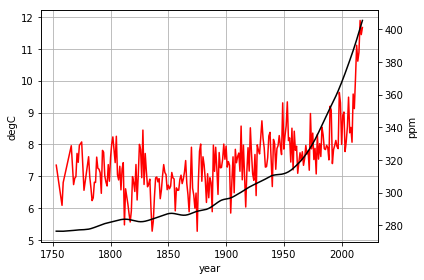

In [33]:
fig, ax1 = plt.subplots()
ax1.plot(c02_temp_df.index, c02_temp_df['average_anual_temp(c)'], c='r')

ax2 = ax1.twinx()
ax2.plot(c02_temp_df.index, c02_temp_df['ppm'], c='k')

ax1.set_ylabel('degC')
ax1.set_xlabel('year')
ax1.grid()

ax2.set_ylabel('ppm')

fig.tight_layout()

In [34]:
# fig, ax1 = plt.subplots()
# fire_df.plot.bar()

In [35]:
# file = '11_2009_Fire_Summary.pdf'
# fileReader = PyPDF2.PdfFileReader(file)
# fileReader.getFields(2)

In [36]:
# cal_fire_2009 = read_pdf(file, pages=2)
# cal_fire_2009.columns

In [37]:
# cal_fire_2009 = cal_fire_2009.set_index(['DIRECT PROTECTION AREA OF:'])

In [38]:
# cal_fire_2009 = cal_fire_2009.dropna()

In [39]:
# for x in cal_fire_2009.index:
#     if 'TOTAL' in x:
#         print(x)

In [40]:
# add year to end for site with many links
# lnk = 'http://calfire.ca.gov/fire_protection/fire_protection_fire_info_redbooks_'

In [41]:
# r = requests.get('http://www.fire.ca.gov/fire_protection/fire_protection_fire_info_redbooks_2009')
# r = requests.get('http://www.fire.ca.gov/downloads/redbooks/2009/02-wildland-statistic-all-agencies/11_2009_Fire_Summary.pdf')


In [42]:
# print(requests.get(lnk+'2009')

In [43]:
# http = urllib3.PoolManager()
# r = http.request('GET', lnk+'2009')
# r.status
# test = str(r.data)

In [44]:
# ls = test.split()
# for x in ls:
#     if 'Fire_Summary' in x:
#         print(x)


In [45]:
# http = urllib3.PoolManager()
# r = http.request('GET','http://www.fire.ca.gov/downloads/redbooks/2009/02-wildland-statistic-all-agencies/11_2009_Fire_Summary.pdf')
# r.data
# r.headers

In [46]:
# years = ['2009', '2010', '2011', '2012', '2013', '2014','2015']
# for year in years:
#     url = f'http://www.predictiveservices.nifc.gov/intelligence/{year}_statssumm/fires_acres.pdf'
#     r = requests.get(url, allow_redirects=True)
#     open(f'example_{year}.pdf', 'wb').write(r.content)

In [47]:
x = pd.read_html('https://www.nifc.gov/fireInfo/fireInfo_stats_totalFires.html')

In [48]:
us_fire_history_df = x[0]
us_fire_history_df = us_fire_history_df.dropna()
us_fire_history_df = us_fire_history_df.set_index(0)
us_fire_history_df.head()

,1,2
0,,
Year,Fires,Acres
2018,58083,8767492
2017,71499,10026086
2016,67743,5509995
2015,68151,10125149


In [49]:
headers = us_fire_history_df.iloc[0]
new_df = pd.DataFrame(us_fire_history_df.values[1:], columns=['Fires', 'Acres'], index=us_fire_history_df.index[1:])
new_df.index.names=['year']

In [50]:
acres = []
for x in new_df.Acres:
    if '*' in x:
        x = x.replace(',', '')
        x = int(x.replace('*', ''))
        acres.append(x)
    else:
        acres.append(int(x))
years = [year for year in new_df.index]

us_fire_df = pd.DataFrame({'acres':acres}, index=years)
us_fire_df = us_fire_df.sort_index(ascending=True)
# us_fire_df.index = pd.to_datetime(us_fire_df.index)
us_fire_df.to_csv('us_fire_acerage.csv')

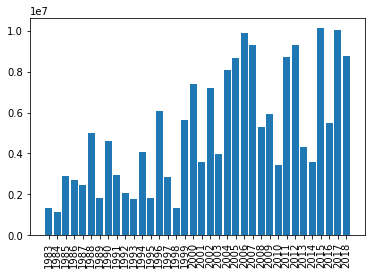

<Figure size 720x504 with 0 Axes>

In [51]:
fig, ax1 = plt.subplots()
plt.figure(figsize=(10,7))
ax1.bar(us_fire_df.index[-2018+1982:], us_fire_df['acres'][-2018+1982:])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
plt.show()

In [52]:
fire_rain_df = us_fire_df.join(seattle_rain_df, how='right')

In [53]:
# fire_rain_df['acres'].corr(fire_rain_df['Prcp'])
fire_rain_df.head()

,acres,Unit,Prcp
1948,16557000,Inches,45.79
1949,15397000,Inches,32.46
1950,15519000,Inches,55.14
1951,10781000,Inches,40.30
1952,14187000,Inches,23.78


In [54]:
df3 = pd.read_csv('seattleWeather_1948-2017.csv')
df3['DATE'] = pd.to_datetime(df3['DATE'])
df3.set_index('DATE', inplace=True)
df3['YEAR'] = pd.DatetimeIndex(df3.index).year
df3['MONTH'] = pd.DatetimeIndex(df3.index).month
df3['DAY'] = pd.DatetimeIndex(df3.index).day

In [55]:
df4= df3.groupby('YEAR')
dc = {}
for year in df3['YEAR'].unique():
    temp_df =  df4.get_group(year)
    dc[year] = temp_df['PRCP'].sum()
seattle_rain_df = pd.DataFrame([dc], index=['Inches of Rain'])
seattle_rain_df

,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
Inches of Rain,45.79,32.46,55.14,40.3,23.78,49.42,41.27,46.61,36.85,34.63,...,30.73,38.44,46.99,36.39,48.26,32.56,48.5,44.83,45.18,43.55


In [56]:
# us_fire_df.columns = us_fire_df.columns.map(int)
# us_fire_df.head()

In [57]:
# dc = us_fire_df.to_dict()['acres']
# us_fire_df = pd.DataFrame([dc], index=['Acres Burnt'])

In [58]:
# comb_df = pd.concat([us_fire_df, seattle_rain_df])

In [59]:
# comb_df = comb_df.dropna(axis=1, how='any')
# comb_df.head()

In [60]:
# comb_df.corr()

In [95]:
# fire_rain_df = fire_rain_df.drop('Unit')
fire_rain_df[['acres', 'Prcp']].corr()

,acres,Prcp
acres,1.000000,0.157095
Prcp,0.157095,1.000000


0.20113485266697248

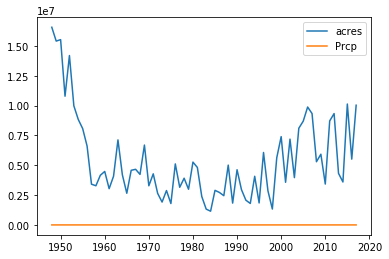

In [99]:
fire_rain_df.plot()
fire_rain_df['acres'][-2018+1983:].corr(fire_rain_df['Prcp'][-2018+1983:])

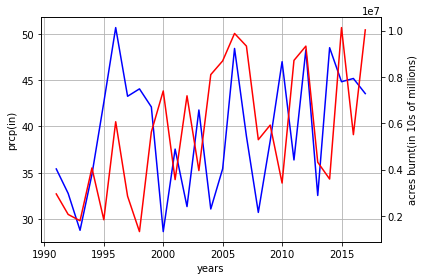

In [107]:
fire_rain_df.index = fire_rain_df.index.values.astype(int)
date = fire_rain_df.index.astype('O')
fig, ax1 = plt.subplots()

ax1.plot(date[-2017+1990:], fire_rain_df['Prcp'][-2017+1990:], c='b')
ax1.locator_params(axis='x', numticks=5)
ax2 = ax1.twinx()
ax2.plot(date[-2017+1990:], fire_rain_df['acres'][-2017+1990:], c='r')


ax1.set_ylabel('prcp(in)')
ax1.set_xlabel('years')
ax1.grid()

plt.savefig('prcp_acres_1990-2015.png')

ax2.set_ylabel('acres burnt(in 10s of millions)')


fig.tight_layout()

Index([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983,
       1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
      dtype='object')

In [64]:
fire_rain_df.dtypes

acres      int64
Unit      object
Prcp     float64
dtype: object

In [65]:
# us_fire_df['acres'].corr(c02_temp_df['average_anual_temp(c)'])


In [66]:
fire_rain_df['acres'].corr(fire_rain_df['Prcp'])

0.1570946438746051

In [67]:
# x = us_fire_df.join(c02_temp_df, how='inner')
# x

In [68]:
# us_fire_df.index = us_fire_df.index.map(int)

In [69]:
# fire_c02_temp_df = us_fire_df.join(c02_temp_df, how='inner')

In [70]:
# fire_c02_temp_df['acres'].corr(fire_c02_temp_df['average_anual_temp(c)'])

In [71]:
biomass_df.index = biomass_df.index.map(int)
biomass_df.head()

,Biomass(ha)
1990,4285410.09
1991,4280129.34
1992,4274848.63
1993,4269567.91
1994,4264287.15


In [72]:
# biomass_df.join(fire_c02_temp_df, how='inner')

In [73]:
c02_temp_acres_prcp_df = c02_temp_df.join(fire_rain_df, how='right')

In [74]:
c02_temp_acres_prcp_bio_df = c02_temp_acres_prcp_df.join(biomass_df, how='right')

In [75]:
climate_corr = c02_temp_acres_prcp_bio_df.corr()

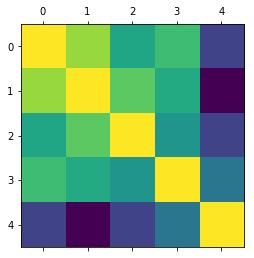

In [76]:
plt.matshow(climate_corr)

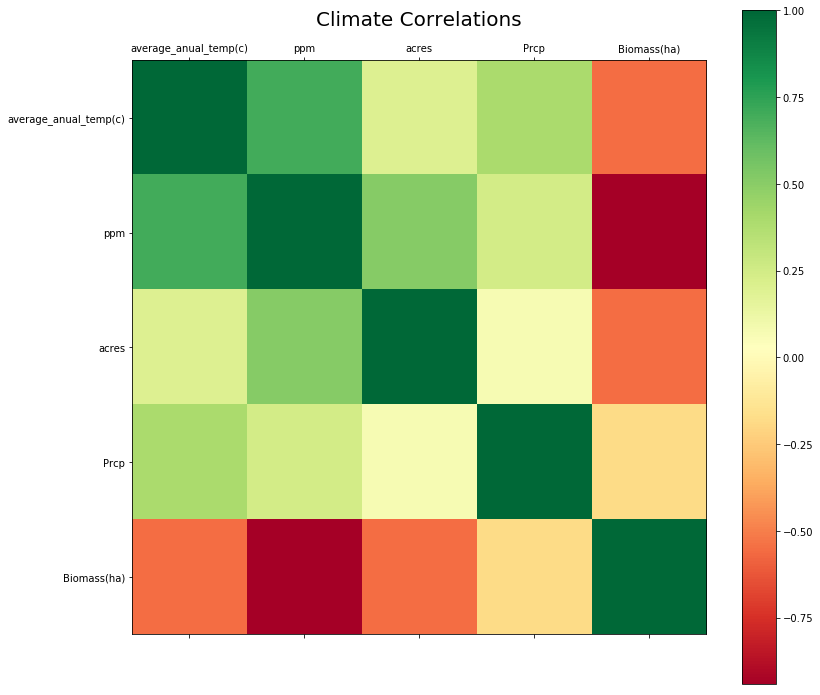

In [108]:
labels = [t for t in climate_corr.columns]
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
s = ax.matshow(climate_corr, cmap=plt.cm.RdYlGn, label=labels)

ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
# mat = np.random.random((5,5))
# plt.imshow(origin="lower", cmap='RdYlGn', interpolation='nearest')




# cbar = fig.colorbar(s, ax=ax, shrink=0.8)
cbar = fig.colorbar(s, ax=ax, shrink=0.8)
# cbar.ax.set_yticklabels(['> 1','0','< -1'])
plt.title('Climate Correlations', fontsize=20)
plt.tight_layout()
plt.savefig('correlations')

plt.show()



In [94]:
climate_corr

,average_anual_temp(c),ppm,acres,Prcp,Biomass(ha)
average_anual_temp(c),1.000000,0.696608,0.198543,0.400533,-0.550481
ppm,0.696608,1.000000,0.510001,0.243414,-0.942040
acres,0.198543,0.510001,1.000000,0.073035,-0.551741
Prcp,0.400533,0.243414,0.073035,1.000000,-0.180290
Biomass(ha),-0.550481,-0.942040,-0.551741,-0.180290,1.000000


In [101]:
c02_temp_acres_prcp_bio_df.to_csv('results.csv')

,average_anual_temp(c),ppm
average_anual_temp(c),1.000000,0.730008
ppm,0.730008,1.000000


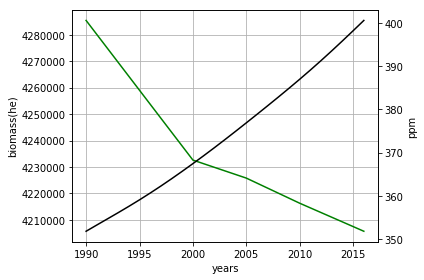

In [116]:
fire_rain_df.index = fire_rain_df.index.values.astype(int)
date = fire_rain_df.index.astype('O')
fig, ax1 = plt.subplots()

ax1.plot(biomass_df.index, biomass_df, c='g')
# ax1.locator_params(axis='x', numticks=5)
ax2 = ax1.twinx()
ax2.plot(biomass_df.index, c02_temp_acres_prcp_bio_df['ppm'][-2017+1990:], c='k')


ax1.set_ylabel('biomass(he)')
ax1.set_xlabel('years')
ax1.grid()

plt.savefig('prcp_acres_1990-2015.png')

ax2.set_ylabel('ppm')

fig.tight_layout()